# Elapsed time

On occasions we want to predict if a customer will purchase from us again. In this situations it might help if we understand how long ago the customer made the last purchase.


## The dataset

We will use the Online Retail II Data Set stored on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II).

Download the xlsx file and save it in the **Datasets** folder within this repo.

**Citation**:

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

We will extract different features from the datetime variable: **InvoiceDate**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime

## Load the data

In [2]:
# File path
file = '../Datasets/online_retail_II.xlsx'

# The data is provided as two sheets in a single Excel file.
# Each sheet contains a different time period.
# Load both and join into a single dataframe.

df_1 = pd.read_excel(file, sheet_name='Year 2009-2010')
df_2 = pd.read_excel(file, sheet_name='Year 2010-2011')

data = pd.concat([df_1, df_2])

print(data.shape)

data.head()

(1067371, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In this dataset, we have the datetime variable in a column: InvoiceDate. We could also have it in the dataframe index. The procedure to extract the datetime features is identical. That is, we would use the methods from pandas dt as shown below.

In [3]:
# Drop data on unknown customers

data.dropna(subset=['Customer ID'], inplace=True)

print(data.shape)

In [5]:
# Number of unique customers

data['Customer ID'].nunique()

5410

In [4]:
# Number of unique customers in the UK

data = data[data['Country']=='United Kingdom']

data['Customer ID'].nunique()

5410

## Time since last transaction

Transaction Recency measures the time between the customer's purchases. It is a way of measuring the business's ability to bring customers back.

Text(0.5, 0, 'Number of purchases per customer')

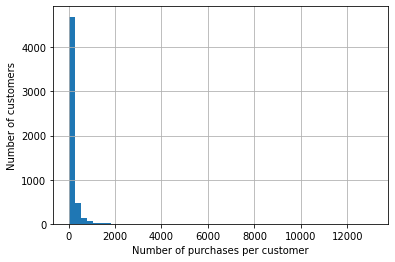

In [12]:
# First: do our customers purchase from us more than once?

data.groupby('Customer ID')['InvoiceDate'].count().hist(bins=50)
plt.ylabel('Number of customers')
plt.xlabel('Number of purchases per customer')

Text(0.5, 0, 'Number of purchases per customer')

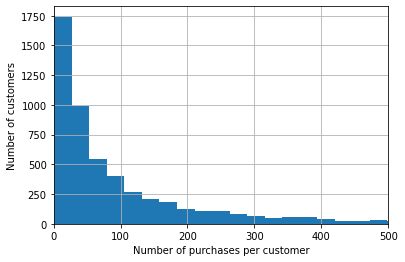

In [13]:
# Zooming in

data.groupby('Customer ID')['InvoiceDate'].count().hist(bins=500)
plt.xlim(0,500)
plt.ylabel('Number of customers')
plt.xlabel('Number of purchases per customer')

If we wanted to forecast our weekly sales, knowing how often our customers come back to us may be helpful.

In [17]:
# First, let's sort the data per customer and per invoice date
# just in case it was not sorted

data.sort_values(by=['Customer ID', 'InvoiceDate'], ascending=True, inplace=True)

data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.5,12346.0,United Kingdom
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.5,12346.0,United Kingdom
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.5,12346.0,United Kingdom
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.5,12346.0,United Kingdom
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.0,12346.0,United Kingdom


In [18]:
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
392731,570715,35967,FOLK ART METAL STAR T-LIGHT HOLDER,36,2011-10-12 10:23:00,0.38,18287.0,United Kingdom
392740,570715,72351B,SET/6 PINK BUTTERFLY T-LIGHTS,24,2011-10-12 10:23:00,2.10,18287.0,United Kingdom
423941,573167,21014,SWISS CHALET TREE DECORATION,24,2011-10-28 09:29:00,0.29,18287.0,United Kingdom
423940,573167,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,18287.0,United Kingdom
423939,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287.0,United Kingdom


In [19]:
t = data['time_since_last_transaction'] = data.groupby('Customer ID')['InvoiceDate'].diff()

t.shape, data.shape

((741301,), (741301, 9))

In [21]:
# Now, we determine the time since the last transaction

data['time_since_last_transaction'] = data.groupby('Customer ID')['InvoiceDate'].diff()

data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,time_since_last_transaction
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.5,12346.0,United Kingdom,NaT
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.5,12346.0,United Kingdom,0 days 02:26:00
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.5,12346.0,United Kingdom,0 days 00:02:00
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.5,12346.0,United Kingdom,3 days 23:45:00
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.0,12346.0,United Kingdom,0 days 00:08:00


In [22]:
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,time_since_last_transaction
392731,570715,35967,FOLK ART METAL STAR T-LIGHT HOLDER,36,2011-10-12 10:23:00,0.38,18287.0,United Kingdom,0 days 00:00:00
392740,570715,72351B,SET/6 PINK BUTTERFLY T-LIGHTS,24,2011-10-12 10:23:00,2.10,18287.0,United Kingdom,0 days 00:00:00
423941,573167,21014,SWISS CHALET TREE DECORATION,24,2011-10-28 09:29:00,0.29,18287.0,United Kingdom,15 days 23:06:00
423940,573167,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,18287.0,United Kingdom,0 days 00:00:00
423939,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287.0,United Kingdom,0 days 00:00:00


In [23]:
# Now it seems that we are better off calculating time elapsed in minutes
# so let's do that


data['time_since_last_transaction'] = data.groupby('Customer ID')['InvoiceDate'].diff() /np.timedelta64(1,'m')

data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,time_since_last_transaction
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.5,12346.0,United Kingdom,NaN
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.5,12346.0,United Kingdom,146.0
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.5,12346.0,United Kingdom,2.0
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.5,12346.0,United Kingdom,5745.0
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.0,12346.0,United Kingdom,8.0


In [24]:
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,time_since_last_transaction
392731,570715,35967,FOLK ART METAL STAR T-LIGHT HOLDER,36,2011-10-12 10:23:00,0.38,18287.0,United Kingdom,0.0
392740,570715,72351B,SET/6 PINK BUTTERFLY T-LIGHTS,24,2011-10-12 10:23:00,2.10,18287.0,United Kingdom,0.0
423941,573167,21014,SWISS CHALET TREE DECORATION,24,2011-10-28 09:29:00,0.29,18287.0,United Kingdom,22986.0
423940,573167,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,18287.0,United Kingdom,0.0
423939,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287.0,United Kingdom,0.0


For more details on how to determine differences in another time units, visit [this article](http://www.datasciencemadesimple.com/difference-two-timestamps-seconds-minutes-hours-pandas-python-2/).

In [30]:
# Calculate revenue per customer per transaction

data['Revenue'] = data['Quantity'] * data['Price']

data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,time_since_last_transaction,revenue,Revenue
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.5,12346.0,United Kingdom,NaN,45.0,45.0
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.5,12346.0,United Kingdom,146.0,22.5,22.5
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.5,12346.0,United Kingdom,2.0,22.5,22.5
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.5,12346.0,United Kingdom,5745.0,22.5,22.5
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.0,12346.0,United Kingdom,8.0,1.0,1.0


In [31]:
# Remove orders that were cancelled

cancelled = data['Invoice'].apply(lambda x: str(x)[0] == 'C')
data = data[~cancelled]

In [47]:
df_gross = pd.concat([
    (data.loc[:, ['InvoiceDate', 'Revenue']]
    .resample('W', on='InvoiceDate')
    .sum()
    ),
    (data.loc[:, ['InvoiceDate', 'time_since_last_transaction']]
    .resample('W', on='InvoiceDate')
    .mean()
    ),
], axis=1)

df_gross.shape

(106, 2)

In [48]:
df_gross.head()

,Revenue,time_since_last_transaction
InvoiceDate,,
2009-12-06,213000.35,6.181182
2009-12-13,195810.04,95.959333
2009-12-20,182396.74,291.143191
2009-12-27,22007.77,465.977273
2010-01-03,0.00,NaN


<AxesSubplot:xlabel='InvoiceDate'>

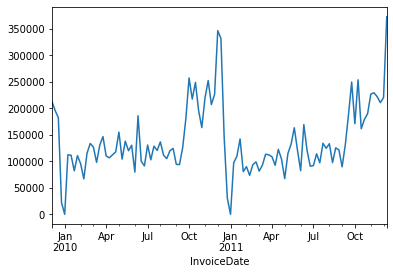

In [50]:
df_gross['Revenue'].plot()

<AxesSubplot:xlabel='InvoiceDate'>

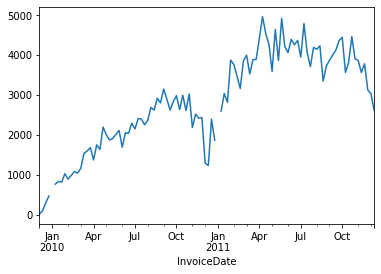

In [51]:
df_gross['time_since_last_transaction'].plot()

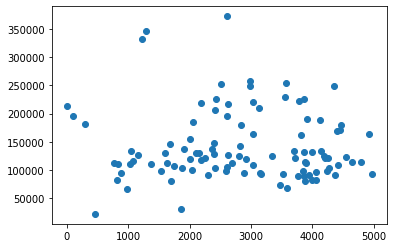

In [42]:
plt.scatter(df_gross['time_since_last_transaction'], df_gross['Revenue'])